# Energy Efficiency

In [1]:
# =====================
# part 0: Install the ucimlrepo package
# =====================
!pip install ucimlrepo

In [2]:
# =====================
# part 1: Import the dataset and required libraries
# =====================
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
print(energy_efficiency.metadata) 
  
# variable information 
print(energy_efficiency.variables) 


{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [3]:
# =====================
# part 2: Inspect values
# =====================
# here we can check the data typ of each feacture and we can see here that Orientation(X6) and Distribution(X8) are integers
# and our targets are float

# Feature	    Type
# X1–X5, X7     Continuous (interval/ratio)
# X6, X8	    Discrete/categorical (nominal/ordinal)
# Y1, Y2	    Continuous (interval/ratio)

X.info()
y.info()
X.head()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      768 non-null    float64
 1   Y2      768 non-null    float64
dtypes: float64(2)
memory usage: 12.1 KB


,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [4]:
# =====================
# part 3: Check missing values
# =====================
# No missing values expected in this specific dataset (small)
print(X.isnull().sum())
print(y.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64
Y1    0
Y2    0
dtype: int64


In [5]:
# ============================================
# 4. Convert continuous target (Y1) into categories
# ============================================
# The original target (Heating Load) is continuous.
# However, according to the project description, we need to use our datasets 
# in a classification context. Since both target variables (Y1 and Y2) represent 
# continuous values, the original problem is actually a regression task.
# Therefore, we transform the target into categorical classes (low, medium, high) 
# so that it can be used for classification.

y_class = pd.qcut(y.iloc[:, 0], q=3, labels=['low', 'medium', 'high'])

# Check class distribution
print(y_class.value_counts())


Y1
low       257
high      256
medium    255
Name: count, dtype: int64


In [6]:
# ============================================
# 5. Encode categorical variables in X
# ============================================
# Orientation (X6) and Glazing Area Distribution (X8) are integer-coded categories.
# We need to convert them into dummy encoded variables.
# 'drop_first=True' avoids dummy variable trap (removes redundant column)

X = pd.get_dummies(X, columns=['X6', 'X8'], drop_first=True)

In [7]:
# ============================================
# 6. Scale numerical features
# ============================================
# Numerical features have different ranges, 
# so we standardize them (mean = 0, std = 1)
# to ensure fair contribution to the model.
# avoid dominance by large-scale features, and improve model convergence.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
# ============================================
# 7. Split data into training and test sets
# ============================================
# We split the dataset to evaluate model performance on unseen data.
# 'stratify' ensures that class proportions remain the same in both sets.

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (614, 14)
Test set size: (154, 14)


In [9]:
# ============================================
# 8. Verify final preprocessed data
# ============================================
# Check that features are scaled and categorical variables are encoded correctly.
# Also verify that class distribution is balanced.

print("Training class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

# The dataset is now clean, scaled, encoded, and ready for modeling.

Training class distribution:
 Y1
low       0.333876
high      0.333876
medium    0.332248
Name: proportion, dtype: float64
Test class distribution:
 Y1
low       0.337662
medium    0.331169
high      0.331169
Name: proportion, dtype: float64


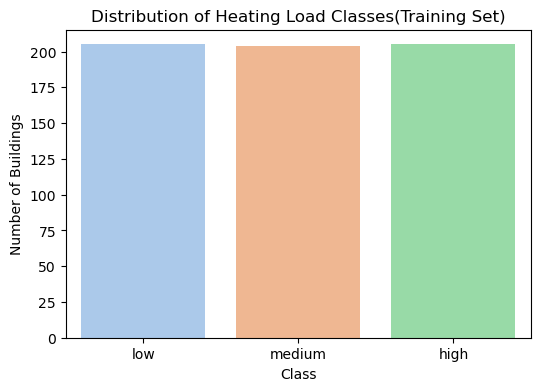

In [10]:
# Histogram of target classes using y_train
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, hue=y_train, palette='pastel')
plt.title("Distribution of Heating Load Classes(Training Set)")
plt.xlabel("Class")
plt.ylabel("Number of Buildings")
plt.show()

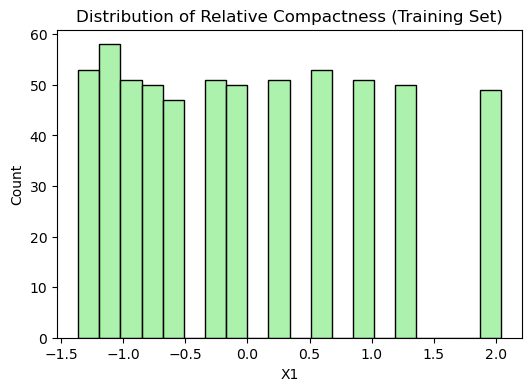

In [11]:
# Histogram of a numerical feature in X_train
plt.figure(figsize=(6,4))
sns.histplot(X_train['X1'], bins=20, color='lightgreen')
plt.title("Distribution of Relative Compactness (Training Set)")
plt.xlabel("X1")
plt.ylabel("Count")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9860\511287268.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


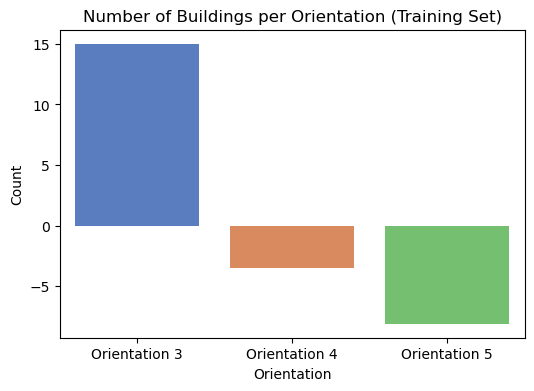

In [12]:
# Bar plot for a categorical feature (Orientation) in X_train
# Sum the dummy columns to count number of buildings per orientation
orientation_cols = ['X6_3', 'X6_4', 'X6_5']
orientation_counts = X_train[orientation_cols].sum()

# strings to df
orientation_counts = orientation_counts.reset_index()
orientation_counts.columns = ['Orientation', 'Count']

# Nicer labels
orientation_counts['Orientation'] = ['Orientation 3', 'Orientation 4', 'Orientation 5']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    x='Orientation',
    y='Count',
    data=orientation_counts,
    palette='muted',
    legend=False
)
plt.title("Number of Buildings per Orientation (Training Set)")
plt.ylabel("Count")
plt.show()

In [13]:
# Convert continuous target to 5 bins
import pandas as pd

y_single = y.iloc[:, 0]  # assuming first column
y_binned = pd.qcut(y_single, q=5, labels=False)

X = X.copy()
X['target'] = y_binned
X.to_csv('dataset1_clean.csv', index=False)
print("✅ Saved binned categorical target for dataset1_clean.csv")


✅ Saved binned categorical target for dataset1_clean.csv
